Análise de dados do site Rotten Tomatoes

Importando as Bibliotecas

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

Extraindo e importando os Dados

In [ ]:
!gdown 1VGB5ANovGJQG2ko4_anIjvnVnd7fEN7d

df = pd.read_csv('rotten_tomatoes.zip', compression ='zip')
df = pd.DataFrame(df)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1VGB5ANovGJQG2ko4_anIjvnVnd7fEN7d
To: /content/rotten_tomatoes.zip
100% 18.4M/18.4M [00:00<00:00, 80.4MB/s]


,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char
0,movies_at_home,action,https://www.rottentomatoes.com/m/come_out_figh...,T,COME OUT FIGHTING,NaN,NaN,NaN,NaN,"Set during WWII, in this military adventure, a...","Genre: War, Action\n\nOriginal Language: Engli...",['https://www.rottentomatoes.com/celebrity/kel...,"['Kellan Lutz', 'Hiram A. Murray', 'Dolph Lund...","['Lieutenant Frank Ross', 'Lieutenant Robert A..."
1,movies_at_home,action,https://www.rottentomatoes.com/m/aka,T,AKA,78.0,fresh,79.0,upright,"In this intense action thriller, a special ops...","Genre: Action, Mystery & thriller, Crime, Dram...",['https://www.rottentomatoes.com/celebrity/alb...,"['Alban Lenoir', 'Éric Cantona', 'Thibault de ...","['Adam Franco', '', '', '', '', 'Jonathan', '\..."
2,movies_at_home,action,https://www.rottentomatoes.com/m/the_woman_king,T,THE WOMAN KING,94.0,certified-fresh,99.0,upright,The Woman King is the remarkable story of the ...,Rating: PG-13 (Partial Nudity|Brief Language|S...,['https://www.rottentomatoes.com/celebrity/vio...,"['Viola Davis', 'Thuso Mbedu', 'Lashana Lynch'...","['Nanisca', 'Nawi', 'Izogie', 'Amenza', 'Santo..."
3,movies_at_home,action,https://www.rottentomatoes.com/m/sisu_2022,T,SISU,94.0,certified-fresh,88.0,upright,"During the last desperate days of WWII, a soli...",Rating: R (Strong Bloody Violence|Language|Gor...,['https://www.rottentomatoes.com/celebrity/jor...,"['Jorma Tommila', 'Aksel Hennie', 'Jack Doolan...","['Aatami', 'Bruno', 'Wolf', 'Aino', 'Schütze',..."
4,movies_at_home,action,https://www.rottentomatoes.com/m/polite_society,T,POLITE SOCIETY,91.0,certified-fresh,84.0,upright,"A merry mash-up of sisterly affection, parenta...",Rating: PG-13 (Strong Language|Some Partial Nu...,['https://www.rottentomatoes.com/celebrity/pri...,"['Priya Kansara', 'Ritu Arya', 'Shobu Kapoor',...","['Ria', 'Lena', 'Fatima', 'Alba', 'Clara', 'Ko..."


Tratamento dos Dados

In [ ]:
# Filtrando NaN
df2 = df[df['tomatometerscore'].notnull()]
df2.head()

,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char
1,movies_at_home,action,https://www.rottentomatoes.com/m/aka,T,AKA,78.0,fresh,79.0,upright,"In this intense action thriller, a special ops...","Genre: Action, Mystery & thriller, Crime, Dram...",['https://www.rottentomatoes.com/celebrity/alb...,"['Alban Lenoir', 'Éric Cantona', 'Thibault de ...","['Adam Franco', '', '', '', '', 'Jonathan', '\..."
2,movies_at_home,action,https://www.rottentomatoes.com/m/the_woman_king,T,THE WOMAN KING,94.0,certified-fresh,99.0,upright,The Woman King is the remarkable story of the ...,Rating: PG-13 (Partial Nudity|Brief Language|S...,['https://www.rottentomatoes.com/celebrity/vio...,"['Viola Davis', 'Thuso Mbedu', 'Lashana Lynch'...","['Nanisca', 'Nawi', 'Izogie', 'Amenza', 'Santo..."
3,movies_at_home,action,https://www.rottentomatoes.com/m/sisu_2022,T,SISU,94.0,certified-fresh,88.0,upright,"During the last desperate days of WWII, a soli...",Rating: R (Strong Bloody Violence|Language|Gor...,['https://www.rottentomatoes.com/celebrity/jor...,"['Jorma Tommila', 'Aksel Hennie', 'Jack Doolan...","['Aatami', 'Bruno', 'Wolf', 'Aino', 'Schütze',..."
4,movies_at_home,action,https://www.rottentomatoes.com/m/polite_society,T,POLITE SOCIETY,91.0,certified-fresh,84.0,upright,"A merry mash-up of sisterly affection, parenta...",Rating: PG-13 (Strong Language|Some Partial Nu...,['https://www.rottentomatoes.com/celebrity/pri...,"['Priya Kansara', 'Ritu Arya', 'Shobu Kapoor',...","['Ria', 'Lena', 'Fatima', 'Alba', 'Clara', 'Ko..."
5,movies_at_home,action,https://www.rottentomatoes.com/m/to_catch_a_ki...,T,TO CATCH A KILLER,50.0,rotten,78.0,upright,"A modern-day Clarice Starling, Eleanor (Shaile...",Rating: R (Strong Language|Strong Violent Cont...,['https://www.rottentomatoes.com/celebrity/sha...,"['Shailene Woodley', 'Ben Mendelsohn', 'Jovan ...","['Eleanor Falco', 'Geoffrey Lammark', 'Mackenz..."


In [ ]:
# Info do dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17866 entries, 1 to 20937
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   modality          17866 non-null  object 
 1   genre             17866 non-null  object 
 2   url               17866 non-null  object 
 3   mined             17866 non-null  object 
 4   title             17866 non-null  object 
 5   tomatometerscore  17866 non-null  float64
 6   tomatometerstate  17866 non-null  object 
 7   audiencescore     17628 non-null  float64
 8   audiencestate     17639 non-null  object 
 9   synopsis          17770 non-null  object 
 10  info              17864 non-null  object 
 11  actor_url         17866 non-null  object 
 12  actor_name        17866 non-null  object 
 13  actor_char        17866 non-null  object 
dtypes: float64(2), object(12)
memory usage: 2.0+ MB


In [ ]:
# Resetando o index
df2.reset_index(inplace=True)

In [ ]:
# Quantidade de linhas
print(len(df2))

17866


Plotando a relação entre Nota da Audiencia x Nota do Rotten

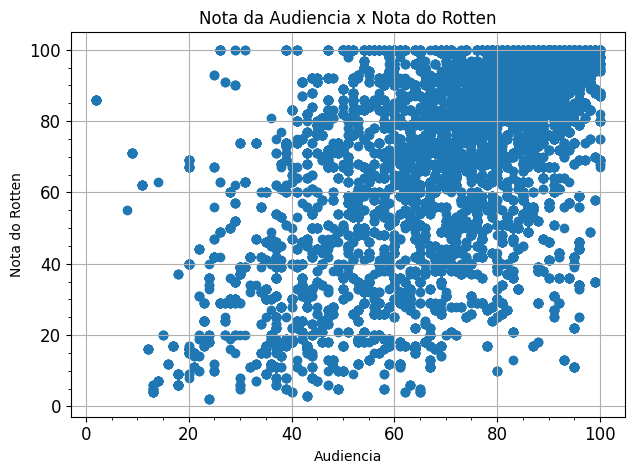

In [ ]:
plt.scatter(df2['audiencescore'], df2['tomatometerscore'])
plt.xlabel('Audiencia')
plt.ylabel('Nota do Rotten')
plt.title('Nota da Audiencia x Nota do Rotten')
plt.grid()
plt.tight_layout()
plt.minorticks_on()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

Plotando a relação entre Gênero x Nota do Rotten - Excluindo os titulos repetidos

Quantidade de Filmes:  2674


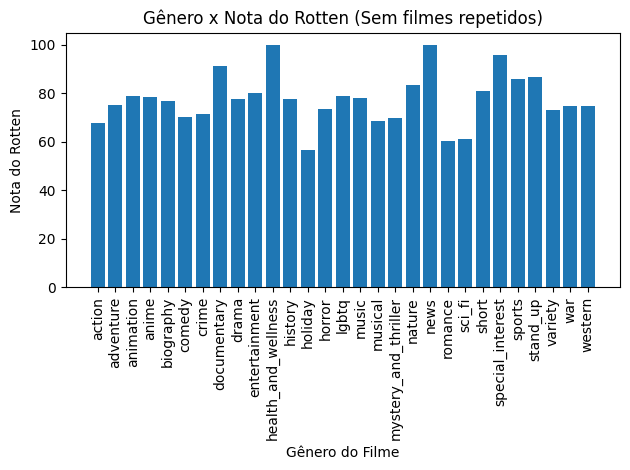

In [ ]:
df3 = df2.drop_duplicates(subset='title', keep='first').copy()
print('Quantidade de Filmes: ',len(df3))
x = df3.groupby('genre')['tomatometerscore'].mean().index
y = df3.groupby('genre')['tomatometerscore'].mean().values
plt.bar(x, y)
plt.xlabel('Gênero do Filme')
plt.ylabel('Nota do Rotten')
plt.title('Gênero x Nota do Rotten (Sem filmes repetidos)')
plt.xticks(x, rotation=90)
plt.tight_layout()
plt.show()
df3.to_excel('dado.xlsx')

Contagem de Filmes por Gênero excluindo filmes duplicados

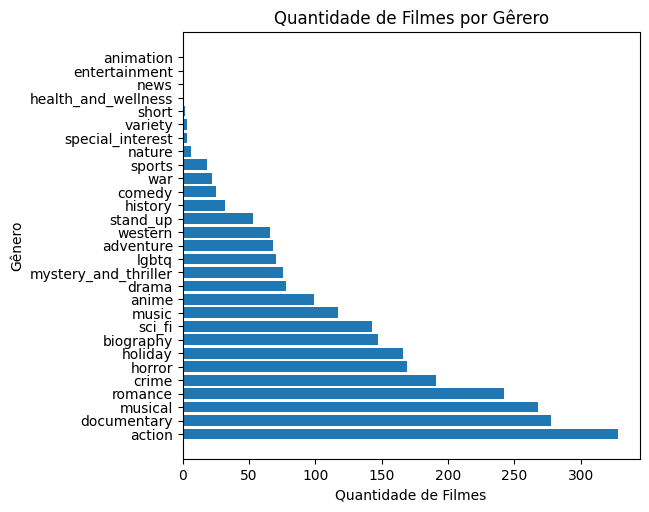

In [ ]:
x = list(df3['genre'].value_counts().index)
y = list(df3['genre'].value_counts())

plt.barh(x, y)
plt.tight_layout()
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gênero')
plt.title('Quantidade de Filmes por Gêrero')
plt.show()

Plotando a relação entre Gênero x Nota do Rotten - Sem exlcuir os titulos repetidos

Quantidade de Filmes:  17866


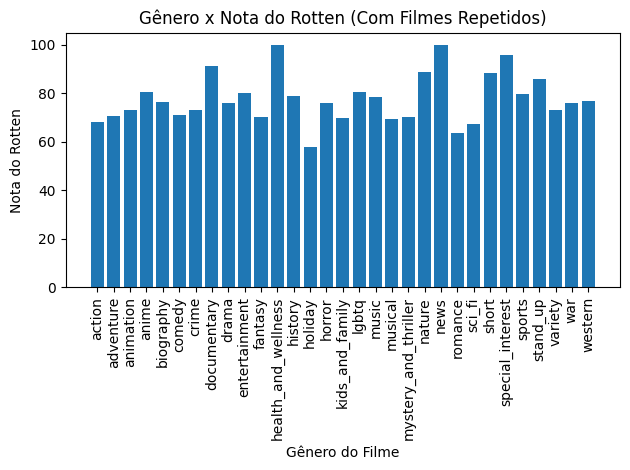

In [ ]:
print('Quantidade de Filmes: ',len(df2))
x = df2.groupby('genre')['tomatometerscore'].mean().index
y = df2.groupby('genre')['tomatometerscore'].mean().values
plt.bar(x, y)
plt.xlabel('Gênero do Filme')
plt.ylabel('Nota do Rotten')
plt.title('Gênero x Nota do Rotten (Com Filmes Repetidos)')
plt.xticks(x, rotation=90)
plt.tight_layout()
plt.show()

Plotando a relação entre Assistir em Casa/Cinema x Nota do Rotten x Nota da Audiencia

<ipython-input-14-fb0f60ee75c7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = df2.groupby('modality')['tomatometerscore','audiencescore'].mean().index


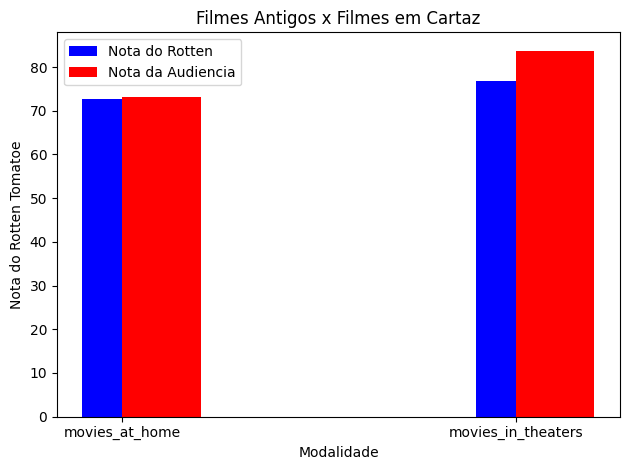

In [ ]:
x = df2.groupby('modality')['tomatometerscore','audiencescore'].mean().index
y = df2.groupby('modality')['tomatometerscore'].mean().values
y2 = df2.groupby('modality')['audiencescore'].mean().values
width = 0.2
plt.bar(x, y, width, label = 'Nota do Rotten',color = 'blue')
plt.bar(x, y2, width, label = 'Nota da Audiencia', color = 'red', align = 'edge')
plt.xlabel('Modalidade')
plt.ylabel('Nota do Rotten Tomatoe')
plt.title('Filmes Antigos x Filmes em Cartaz')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Splitando os dados das colunas do Nome dos Atores de index 0 (Primeiro)

In [ ]:
df2['Primeiro Ator'] = df2['actor_name'].str.split(',').str[0].str.strip().copy()
df2.head()

<ipython-input-15-c453480609a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Primeiro Ator'] = df2['actor_name'].str.split(',').str[0].str.strip().copy()


,index,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char,Primeiro Ator
0,1,movies_at_home,action,https://www.rottentomatoes.com/m/aka,T,AKA,78.0,fresh,79.0,upright,"In this intense action thriller, a special ops...","Genre: Action, Mystery & thriller, Crime, Dram...",['https://www.rottentomatoes.com/celebrity/alb...,"['Alban Lenoir', 'Éric Cantona', 'Thibault de ...","['Adam Franco', '', '', '', '', 'Jonathan', '\...",['Alban Lenoir'
1,2,movies_at_home,action,https://www.rottentomatoes.com/m/the_woman_king,T,THE WOMAN KING,94.0,certified-fresh,99.0,upright,The Woman King is the remarkable story of the ...,Rating: PG-13 (Partial Nudity|Brief Language|S...,['https://www.rottentomatoes.com/celebrity/vio...,"['Viola Davis', 'Thuso Mbedu', 'Lashana Lynch'...","['Nanisca', 'Nawi', 'Izogie', 'Amenza', 'Santo...",['Viola Davis'
2,3,movies_at_home,action,https://www.rottentomatoes.com/m/sisu_2022,T,SISU,94.0,certified-fresh,88.0,upright,"During the last desperate days of WWII, a soli...",Rating: R (Strong Bloody Violence|Language|Gor...,['https://www.rottentomatoes.com/celebrity/jor...,"['Jorma Tommila', 'Aksel Hennie', 'Jack Doolan...","['Aatami', 'Bruno', 'Wolf', 'Aino', 'Schütze',...",['Jorma Tommila'
3,4,movies_at_home,action,https://www.rottentomatoes.com/m/polite_society,T,POLITE SOCIETY,91.0,certified-fresh,84.0,upright,"A merry mash-up of sisterly affection, parenta...",Rating: PG-13 (Strong Language|Some Partial Nu...,['https://www.rottentomatoes.com/celebrity/pri...,"['Priya Kansara', 'Ritu Arya', 'Shobu Kapoor',...","['Ria', 'Lena', 'Fatima', 'Alba', 'Clara', 'Ko...",['Priya Kansara'
4,5,movies_at_home,action,https://www.rottentomatoes.com/m/to_catch_a_ki...,T,TO CATCH A KILLER,50.0,rotten,78.0,upright,"A modern-day Clarice Starling, Eleanor (Shaile...",Rating: R (Strong Language|Strong Violent Cont...,['https://www.rottentomatoes.com/celebrity/sha...,"['Shailene Woodley', 'Ben Mendelsohn', 'Jovan ...","['Eleanor Falco', 'Geoffrey Lammark', 'Mackenz...",['Shailene Woodley'


Função em regex para substituir por vazio os caracteres especiais (menos espaço) e Aplicando na coluna a função em Regex

In [ ]:
def regex_atores(atores):
    limpeza = re.sub(r'[^a-zA-Z0-9\s]', '', atores)
    return limpeza

df2['Primeiro Ator'] = df2['Primeiro Ator'].apply(regex_atores)

<ipython-input-16-590e4d57ba82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Primeiro Ator'] = df2['Primeiro Ator'].apply(regex_atores)


Plotando a relação entre Ator Principal x Nota do Rotten = 100

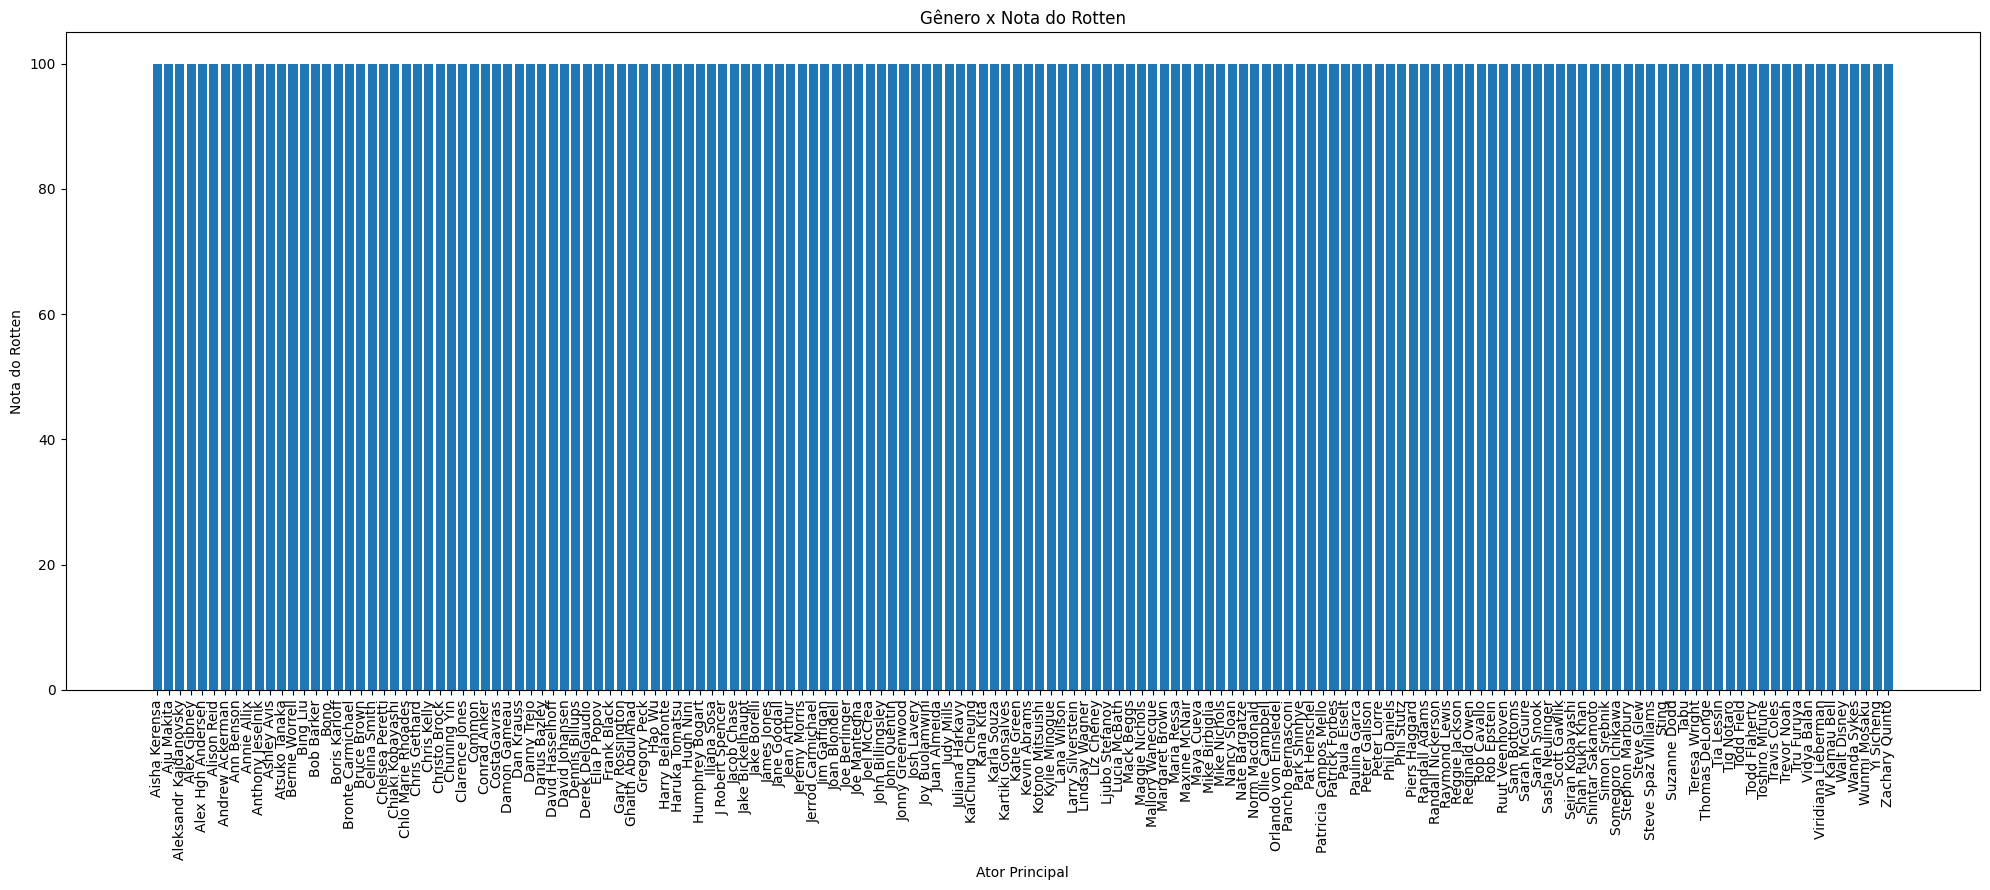

Tem ator para .....


In [ ]:
media = df2.groupby('Primeiro Ator')['tomatometerscore'].mean()
media_100 = media[media == 100]

x = media_100.index
y = media_100.values

plt.figure(figsize=(20,9))
plt.bar(x, y)
plt.xlabel('Ator Principal')
plt.ylabel('Nota do Rotten')
plt.title('Gênero x Nota do Rotten')
plt.xticks(x, rotation=90)
plt.tight_layout()
plt.show()
print('Tem ator para .....')

Filtrando Nicolas Cage no DataSet

In [ ]:
ator_alvo = 'Nicolas Cage'
df5 = df2[df2['Primeiro Ator'] == ator_alvo].copy()
df5.head()

,index,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char,Primeiro Ator
584,597,movies_at_home,action,https://www.rottentomatoes.com/m/willys_wonder...,T,WILLY'S WONDERLAND,60.0,fresh,68.0,upright,A quiet loner (Nicolas Cage) finds himself str...,"Genre: Horror, Action, Mystery & thriller\n\nO...",['https://www.rottentomatoes.com/celebrity/nic...,"['Nicolas Cage', 'Emily Tosta', 'Beth Grant', ...","['The Janitor', 'Liv Hawthorne', 'Sheriff Lund...",Nicolas Cage
595,608,movies_at_home,action,https://www.rottentomatoes.com/m/the_old_way,T,THE OLD WAY,31.0,rotten,70.0,upright,Academy Award® winner Nicolas Cage stars in hi...,"Rating: R (Violence)\n\nGenre: Western, Action...",['https://www.rottentomatoes.com/celebrity/nic...,"['Nicolas Cage', 'Ryan Kiera Armstrong', 'Clin...","['Colton Briggs', 'Brooke', 'Eustice', 'Big Mi...",Nicolas Cage
769,785,movies_at_home,action,https://www.rottentomatoes.com/m/willys_wonder...,T,WILLY'S WONDERLAND,60.0,fresh,68.0,upright,A quiet loner (Nicolas Cage) finds himself str...,"Genre: Horror, Action, Mystery & thriller\n\nO...",['https://www.rottentomatoes.com/celebrity/nic...,"['Nicolas Cage', 'Emily Tosta', 'Beth Grant', ...","['The Janitor', 'Liv Hawthorne', 'Sheriff Lund...",Nicolas Cage
780,796,movies_at_home,action,https://www.rottentomatoes.com/m/the_old_way,T,THE OLD WAY,31.0,rotten,70.0,upright,Academy Award® winner Nicolas Cage stars in hi...,"Rating: R (Violence)\n\nGenre: Western, Action...",['https://www.rottentomatoes.com/celebrity/nic...,"['Nicolas Cage', 'Ryan Kiera Armstrong', 'Clin...","['Colton Briggs', 'Brooke', 'Eustice', 'Big Mi...",Nicolas Cage
982,1001,movies_at_home,action,https://www.rottentomatoes.com/m/willys_wonder...,T,WILLY'S WONDERLAND,60.0,fresh,68.0,upright,A quiet loner (Nicolas Cage) finds himself str...,"Genre: Horror, Action, Mystery & thriller\n\nO...",['https://www.rottentomatoes.com/celebrity/nic...,"['Nicolas Cage', 'Emily Tosta', 'Beth Grant', ...","['The Janitor', 'Liv Hawthorne', 'Sheriff Lund...",Nicolas Cage


Plotando a relação entre Nota do Rotten x Nota da Audiencia, por Gênero, para o Ator Nicolas Cage

<ipython-input-60-5656c9a3e1aa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media = df5.groupby('genre')['tomatometerscore','audiencescore'].mean()


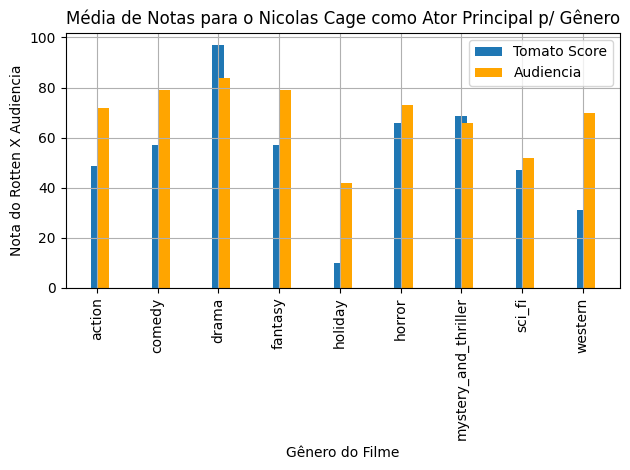

In [ ]:
media = df5.groupby('genre')['tomatometerscore','audiencescore'].mean()

x = media.index
y = media['tomatometerscore'].values
y2 = media['audiencescore'].values
width = 0.2
plt.bar(x, y, width, label = 'Tomato Score')
plt.bar(x, y2, width, label= 'Audiencia', align='edge', color='orange')
plt.xlabel('Gênero do Filme')
plt.ylabel('Nota do Rotten X Audiencia')
plt.title('Média de Notas para o Nicolas Cage como Ator Principal p/ Gênero')
plt.xticks(x, rotation=90)
plt.legend(loc= 'upper right')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Melhor gênero do Nicolas para os Criticos e Audiencia
df5[df5['genre'] == 'drama']

,index,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char,Primeiro Ator
7200,8511,movies_at_home,drama,https://www.rottentomatoes.com/m/pig_2021,T,PIG,97.0,certified-fresh,84.0,upright,A truffle hunter who lives alone in the Oregon...,"Rating: R\n\nGenre: Drama, Mystery & thriller\...",['https://www.rottentomatoes.com/celebrity/nic...,"['Nicolas Cage', 'Alex Wolff', 'Adam Arkin', '...","['Rob', 'Amir', 'Darius', 'Charlotte', 'Lori',...",Nicolas Cage


Filtrando Adam Sandler no DataSet

In [ ]:
ator_alvo2 = 'Adam Sandler'
df6 = df2[df2['Primeiro Ator'] == ator_alvo2].copy()
df6.head()

,index,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char,Primeiro Ator
155,161,movies_at_home,action,https://www.rottentomatoes.com/m/murder_mystery_2,T,MURDER MYSTERY 2,45.0,rotten,47.0,spilled,Now full-time detectives struggling to get the...,Rating: PG-13 (Suggestive Material|Bloody Imag...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Jennifer Aniston', 'Mark Str...","['Nick Spitz', 'Audrey Spitz', '', 'Maharajah'...",Adam Sandler
247,255,movies_at_home,action,https://www.rottentomatoes.com/m/murder_mystery_2,T,MURDER MYSTERY 2,45.0,rotten,47.0,spilled,Now full-time detectives struggling to get the...,Rating: PG-13 (Suggestive Material|Bloody Imag...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Jennifer Aniston', 'Mark Str...","['Nick Spitz', 'Audrey Spitz', '', 'Maharajah'...",Adam Sandler
373,383,movies_at_home,action,https://www.rottentomatoes.com/m/murder_mystery_2,T,MURDER MYSTERY 2,45.0,rotten,47.0,spilled,Now full-time detectives struggling to get the...,Rating: PG-13 (Suggestive Material|Bloody Imag...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Jennifer Aniston', 'Mark Str...","['Nick Spitz', 'Audrey Spitz', '', 'Maharajah'...",Adam Sandler
525,538,movies_at_home,action,https://www.rottentomatoes.com/m/murder_mystery_2,T,MURDER MYSTERY 2,45.0,rotten,47.0,spilled,Now full-time detectives struggling to get the...,Rating: PG-13 (Suggestive Material|Bloody Imag...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Jennifer Aniston', 'Mark Str...","['Nick Spitz', 'Audrey Spitz', '', 'Maharajah'...",Adam Sandler
710,726,movies_at_home,action,https://www.rottentomatoes.com/m/murder_mystery_2,T,MURDER MYSTERY 2,45.0,rotten,47.0,spilled,Now full-time detectives struggling to get the...,Rating: PG-13 (Suggestive Material|Bloody Imag...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Jennifer Aniston', 'Mark Str...","['Nick Spitz', 'Audrey Spitz', '', 'Maharajah'...",Adam Sandler


Plotando a relação entre Nota do Rotten x Nota da Audiencia, por Gênero, para o Ator Adam Sandler

<ipython-input-59-f5bd16f81c0a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media = df6.groupby('genre')['tomatometerscore','audiencescore'].mean()


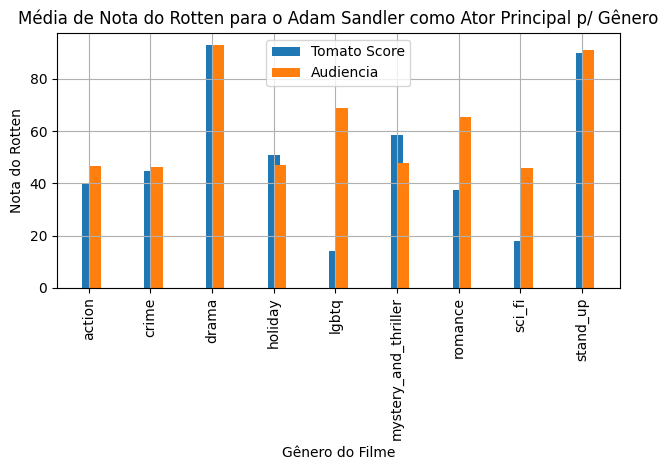

In [ ]:
media = df6.groupby('genre')['tomatometerscore','audiencescore'].mean()

x = media.index
y = media['tomatometerscore'].values
y2 = media['audiencescore'].values
width = 0.2
plt.bar(x, y, width, label = 'Tomato Score')
plt.bar(x, y2, width, label = 'Audiencia', align = 'edge')
plt.xlabel('Gênero do Filme')
plt.ylabel('Nota do Rotten')
plt.title('Média de Nota do Rotten para o Adam Sandler como Ator Principal p/ Gênero')
plt.xticks(x, rotation=90)
plt.grid()
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()

In [ ]:
# Melhor gênero do Adam para os Criticos e Audiencia
df6[df6['genre'] == 'drama']

,index,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char,Primeiro Ator
7100,8404,movies_at_home,drama,https://www.rottentomatoes.com/m/hustle_2022,T,HUSTLE,93.0,certified-fresh,93.0,upright,Stanley Sugerman's (Adam Sandler) love for bas...,Rating: R (Language)\n\nGenre: Drama\n\nOrigin...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Juancho Hernangomez', 'Queen...","['Stanley Sugerman', 'Bo Cruz', 'Teresa Sugerm...",Adam Sandler
7188,8499,movies_at_home,drama,https://www.rottentomatoes.com/m/hustle_2022,T,HUSTLE,93.0,certified-fresh,93.0,upright,Stanley Sugerman's (Adam Sandler) love for bas...,Rating: R (Language)\n\nGenre: Drama\n\nOrigin...,['https://www.rottentomatoes.com/celebrity/ada...,"['Adam Sandler', 'Juancho Hernangomez', 'Queen...","['Stanley Sugerman', 'Bo Cruz', 'Teresa Sugerm...",Adam Sandler


Plotando a relação entre Icone do Rotten x Nota do Rotten x Audiencia

<ipython-input-23-28c57dd1ef1e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media = df2.groupby('tomatometerstate')['tomatometerscore','audiencescore'].mean()


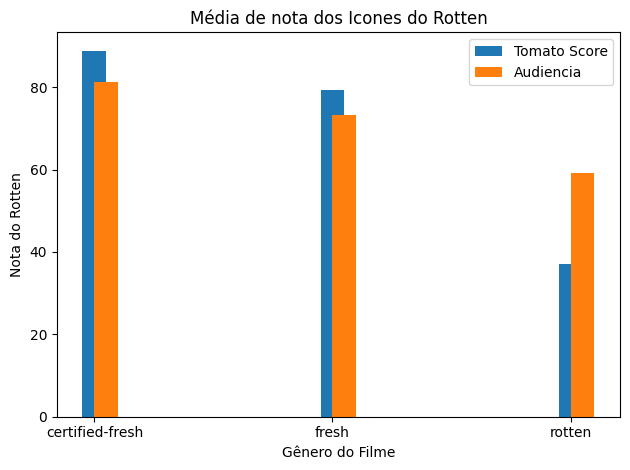

In [ ]:
media = df2.groupby('tomatometerstate')['tomatometerscore','audiencescore'].mean()

x = media.index
y = media['tomatometerscore'].values
y2 = media['audiencescore'].values
width = 0.1
plt.bar(x, y, width, label = 'Tomato Score')
plt.bar(x, y2, width, label = 'Audiencia', align = 'edge')
plt.xlabel('Gênero do Filme')
plt.ylabel('Nota do Rotten')
plt.title('Média de nota dos Icones do Rotten')
# plt.xticks(x, rotation=90)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

Função em regex para procurar o ano da data de estreia na coluna Info

In [ ]:
df2['info'] = df2['info'].astype(str)
def extract_year(text):
    pattern = re.compile(r'Release Date \(Theaters\): \w+ \d{1,2}, (\d{4})')
    match = pattern.search(text)
    if match:
        return match.group(1)
    else:
        return None

# Apply the function to the 'info' column
df2['Ano de Estreia'] = df2['info'].apply(lambda x: extract_year(x)).copy()
df2.head()

<ipython-input-50-5f427bdb6495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['info'] = df2['info'].astype(str)
<ipython-input-50-5f427bdb6495>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ano de Estreia'] = df2['info'].apply(lambda x: extract_year(x)).copy()


,index,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char,Primeiro Ator,Ano de Estreia
0,1,movies_at_home,action,https://www.rottentomatoes.com/m/aka,T,AKA,78.0,fresh,79.0,upright,"In this intense action thriller, a special ops...","Genre: Action, Mystery & thriller, Crime, Dram...",['https://www.rottentomatoes.com/celebrity/alb...,"['Alban Lenoir', 'Éric Cantona', 'Thibault de ...","['Adam Franco', '', '', '', '', 'Jonathan', '\...",Alban Lenoir,None
1,2,movies_at_home,action,https://www.rottentomatoes.com/m/the_woman_king,T,THE WOMAN KING,94.0,certified-fresh,99.0,upright,The Woman King is the remarkable story of the ...,Rating: PG-13 (Partial Nudity|Brief Language|S...,['https://www.rottentomatoes.com/celebrity/vio...,"['Viola Davis', 'Thuso Mbedu', 'Lashana Lynch'...","['Nanisca', 'Nawi', 'Izogie', 'Amenza', 'Santo...",Viola Davis,2022
2,3,movies_at_home,action,https://www.rottentomatoes.com/m/sisu_2022,T,SISU,94.0,certified-fresh,88.0,upright,"During the last desperate days of WWII, a soli...",Rating: R (Strong Bloody Violence|Language|Gor...,['https://www.rottentomatoes.com/celebrity/jor...,"['Jorma Tommila', 'Aksel Hennie', 'Jack Doolan...","['Aatami', 'Bruno', 'Wolf', 'Aino', 'Schütze',...",Jorma Tommila,2023
3,4,movies_at_home,action,https://www.rottentomatoes.com/m/polite_society,T,POLITE SOCIETY,91.0,certified-fresh,84.0,upright,"A merry mash-up of sisterly affection, parenta...",Rating: PG-13 (Strong Language|Some Partial Nu...,['https://www.rottentomatoes.com/celebrity/pri...,"['Priya Kansara', 'Ritu Arya', 'Shobu Kapoor',...","['Ria', 'Lena', 'Fatima', 'Alba', 'Clara', 'Ko...",Priya Kansara,2023
4,5,movies_at_home,action,https://www.rottentomatoes.com/m/to_catch_a_ki...,T,TO CATCH A KILLER,50.0,rotten,78.0,upright,"A modern-day Clarice Starling, Eleanor (Shaile...",Rating: R (Strong Language|Strong Violent Cont...,['https://www.rottentomatoes.com/celebrity/sha...,"['Shailene Woodley', 'Ben Mendelsohn', 'Jovan ...","['Eleanor Falco', 'Geoffrey Lammark', 'Mackenz...",Shailene Woodley,2023


Plotando a média de notas pelos criticos por ano, considerando médias maiores que 80.

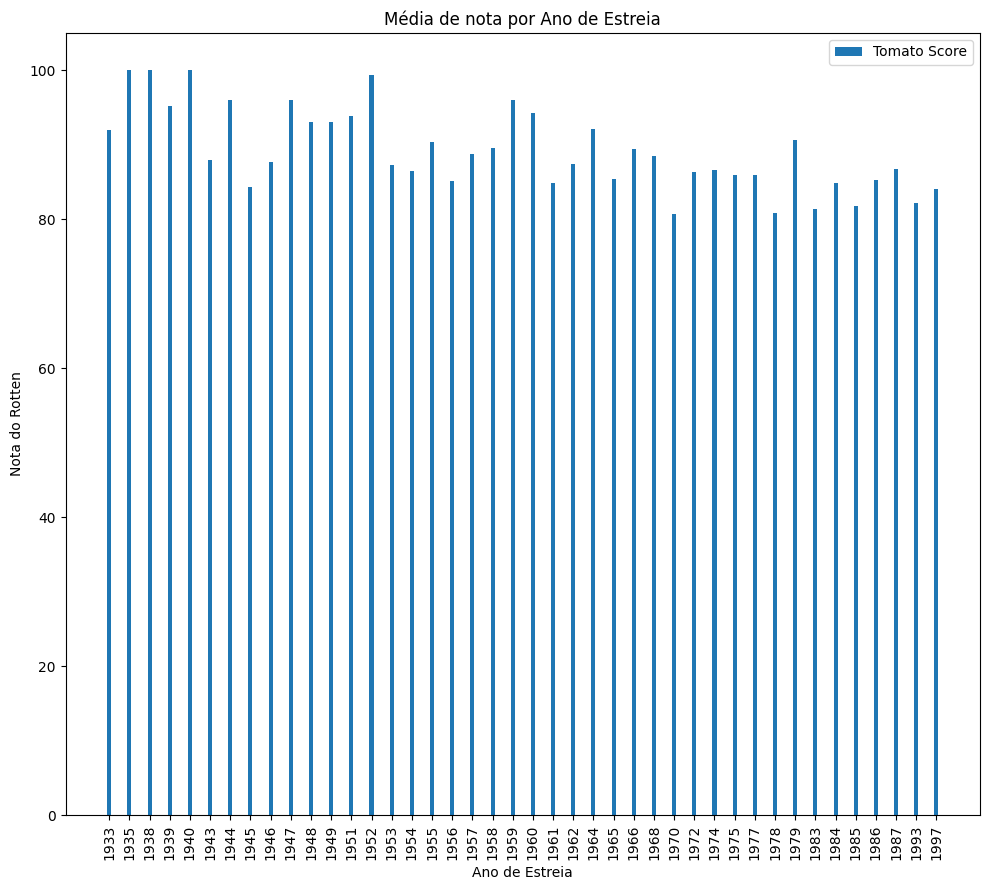

In [ ]:
tomato_ano_estreia = df2.groupby('Ano de Estreia')['tomatometerscore'].mean()
medias_acima_80 = tomato_ano_estreia[tomato_ano_estreia > 80].dropna().copy()
x = medias_acima_80.index
y = medias_acima_80.values
width = 0.2
plt.figure(figsize=(10,9))
plt.bar(x, y, width, label = 'Tomato Score')
plt.xlabel('Ano de Estreia')
plt.ylabel('Nota do Rotten')
plt.title('Média de nota por Ano de Estreia')
plt.xticks(x, rotation=90)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

Plotando a média de notas pelos criticos por ano, considerando médias maiores que 80.

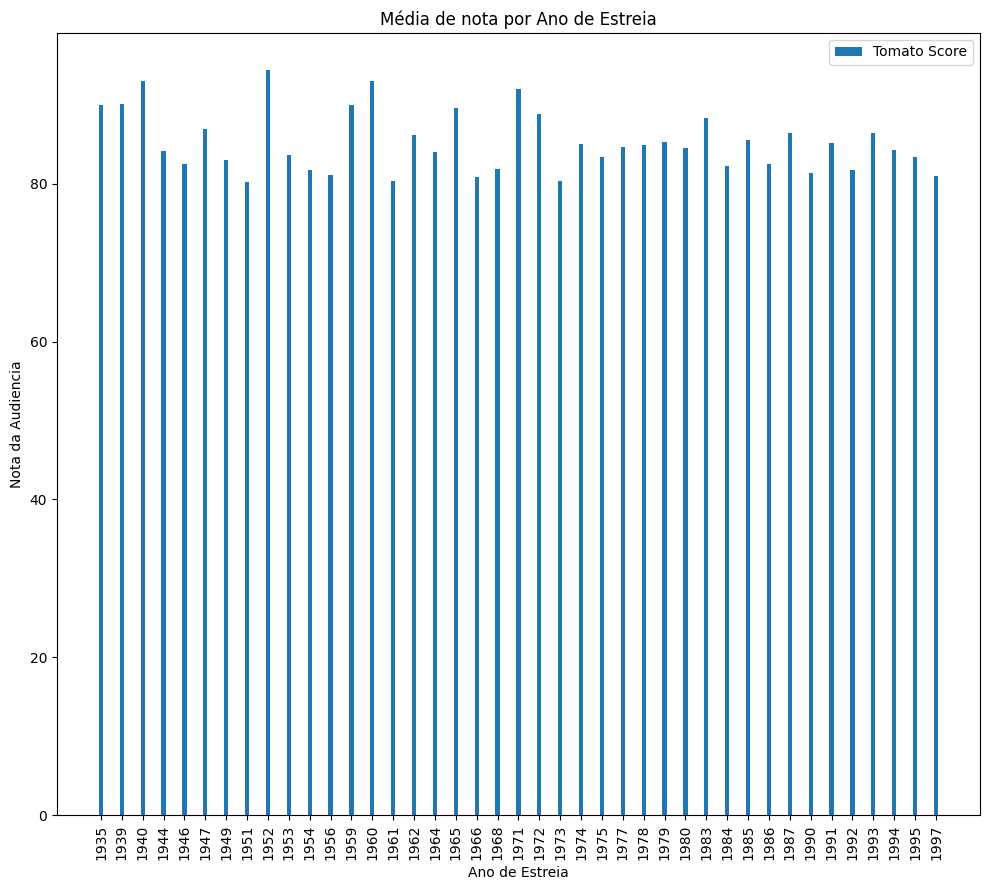

In [ ]:
audiencia_ano_estreia = df2.groupby('Ano de Estreia')['audiencescore'].mean()
medias_acima_80 = audiencia_ano_estreia[audiencia_ano_estreia > 80].dropna().copy()
x = medias_acima_80.index
y = medias_acima_80.values
width = 0.2
plt.figure(figsize=(10,9))
plt.bar(x, y, width, label = 'Tomato Score')
plt.xlabel('Ano de Estreia')
plt.ylabel('Nota da Audiencia')
plt.title('Média de nota por Ano de Estreia')
plt.xticks(x, rotation=90)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

**Conclusões da Análise do Dataset Rotten Tomatoes:**

**Nota do Rotten x Audiência:**
Há uma tendência geral de concordância entre as notas do público e dos críticos. Filmes bem avaliados pela audiência tendem a receber boas notas do Rotten, e vice-versa. No entanto, há casos isolados em que as avaliações diferem significativamente.

**Nota do Rotten x Gênero:**
Os gêneros de notícia e saúde/bem-estar têm as melhores médias no Rotten, embora com apenas um filme cada com a maior nota. Observou-se que a duplicidade de filmes na contagem influencia as médias, indicando que a escolha de manter a primeira ou última instância duplicada afeta as notas por gênero.

**Quantidade de Filmes por Gênero:**
A distribuição da quantidade de filmes por gênero não foi detalhadamente discutida, mas é um fator relevante para compreender a representatividade de diferentes categorias no dataset.

**Nota do Rotten e Audiência para Filmes Lançados e em Cartaz:**
Filmes em cartaz tendem a ter notas superiores aos já lançados. No entanto, sugere-se que, ao sair de cartaz, a nota pode diminuir à medida que são mais analisados por críticos e audiência.

**Atores x Nota do Rotten:**
Muitos atores principais obtiveram notas máximas, indicando a presença de filmes bem avaliados. Contudo, a interpretação completa requer mais detalhes sobre a distribuição das notas e a diversidade de atores analisados.

**Notas por Gênero do Ator Nicolas Cage:**
A maior média de notas do Nicolas Cage é o gênero Drama, mas há uma diferença notável na segunda maior média entre Rotten e Audiência, sendo Mistério e Suspense, Comédia e Fantasia, respectivamente.

**Notas por Gênero do Ator Adam Sandler:**
Similar a Nicolas Cage, Adam Sandler tem a maior média nos filmes de Drama. No entanto, a segunda maior média entre Rotten e Audiência é mais consistente, sendo a do gênero Stand-UP.

**Comparativo das Médias das Notas do Rotten e Audiência x Selo do Rotten Tomatoes:**
As médias entre os selos Certificadamente Fresco e Tomate Fresco são semelhantes, indicando concordância entre críticos e audiência. No entanto, filmes com o selo Tomate Podre mostram uma discrepância, sugerindo que filmes mal avaliados pelos críticos podem ser apreciados pelo público.

**Média dos Críticos e da Audiência por Ano:**
Filmes anteriores à década de 21 têm médias mais altas tanto para críticos quanto para audiência, indicando uma possível mudança nas preferências ao longo do tempo.

*Essas conclusões fornecem uma visão geral das relações e padrões observados no dataset do Rotten Tomatoes, destacando a importância de considerar diversos fatores ao interpretar as avaliações de filmes.*